In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [348]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [349]:
telecom.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.2,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.0,0.00


In [350]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [351]:
values = pd.DataFrame(telecom.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

,index,null
2,loc_og_t2o_mou,1018
3,std_og_t2o_mou,1018
4,loc_ic_t2o_mou,1018
6,last_date_of_month_7,601
7,last_date_of_month_8,1100
8,last_date_of_month_9,1659
13,onnet_mou_6,3937
14,onnet_mou_7,3859
15,onnet_mou_8,5378
16,onnet_mou_9,7745


In [352]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [353]:
# Imputing the below fields to zero
# Note this was also a suggestion from Upgrad
zero_imputation=['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8']
for i in zero_imputation:
    telecom[i].fillna(0, inplace=True)

In [354]:
telecom['good_phase_cust'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] + #Total recharge amt in 6 & 7
                              (   
                                  #average rech amt * number of times recharge was done for 6 & 7 month
                                  (telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']) + 
                                  (telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7'])
                              )
                             )

In [355]:
telecom_1 = telecom[telecom['good_phase_cust'] > telecom['good_phase_cust'].quantile(0.7)]

In [356]:
telecom_1.loc[:,'churn'] = 0

telecom_1.loc[(telecom_1['total_ic_mou_9'] == 0) &
    (telecom_1['total_og_mou_9'] == 0) &
    (telecom_1['vol_2g_mb_9'] == 0) &
    (telecom_1['vol_3g_mb_9'] == 0), ['churn']] = 1

telecom_1['churn'].value_counts()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0    27520
1     2433
Name: churn, dtype: int64

In [357]:
telecom_1.shape

(29953, 228)

In [358]:
nine_month_var=['last_date_of_month_9', 'sep_vbc_3g','arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']

In [359]:
telecom_1 = telecom_1.drop(nine_month_var, axis=1)
telecom_1.shape

(29953, 173)

In [360]:
values = pd.DataFrame(telecom_1.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

,index,null
2,loc_og_t2o_mou,223
3,std_og_t2o_mou,223
4,loc_ic_t2o_mou,223
6,last_date_of_month_7,27
7,last_date_of_month_8,165
11,onnet_mou_6,542
12,onnet_mou_7,536
13,onnet_mou_8,1172
14,offnet_mou_6,542
15,offnet_mou_7,536


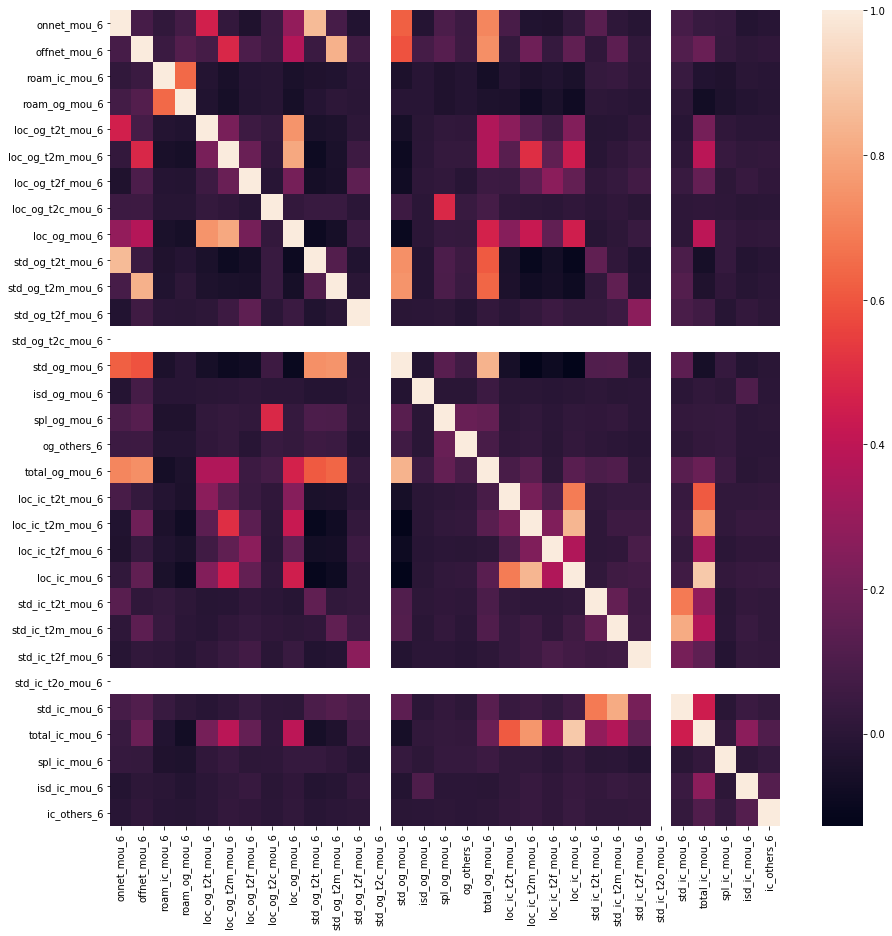

In [361]:
plt.figure(figsize=(15,15))
sns.heatmap(telecom_1[['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].corr())
plt.show()

In [362]:
# month 6 call
temp = pd.DataFrame(telecom_1['loc_ic_mou_6'] -
                    (telecom_1['loc_ic_t2t_mou_6'] + telecom_1['loc_ic_t2m_mou_6'] +telecom_1['loc_ic_t2f_mou_6'])
                   )
print("local incoming calls for month 6")
print(temp.describe())

# Analyzing all the std incoming calls for month 6
temp = pd.DataFrame(telecom_1['std_ic_mou_6'] -
             (telecom_1['std_ic_t2t_mou_6'] + telecom_1['std_ic_t2m_mou_6'] + telecom_1['std_ic_t2f_mou_6']+telecom_1['std_ic_t2o_mou_6'])
            )
print("std incoming calls for month 6 ---")
print(temp.describe())

# Analyzing total incoming calls for month 6
temp = pd.DataFrame(telecom_1['total_ic_mou_6'] -
             (telecom_1['loc_ic_mou_6']+ telecom_1['std_ic_mou_6']+ telecom_1['isd_ic_mou_6']+
              telecom_1['spl_ic_mou_6']+ telecom_1['ic_others_6'])
            )
print("total incoming calls for month 6 ---")
print(temp.describe())

local incoming calls for month 6
                  0
count  2.941100e+04
mean   9.810275e-03
std    6.461618e-03
min   -4.547474e-13
25%    1.000000e-02
50%    1.000000e-02
75%    1.000000e-02
max    2.000000e-02
std incoming calls for month 6 ---
                  0
count  2.941100e+04
mean   3.652035e-03
std    5.338061e-03
min   -4.547474e-13
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e-02
max    2.000000e-02
total incoming calls for month 6 ---
                  0
count  2.941100e+04
mean   8.265955e-03
std    7.177176e-03
min   -9.094947e-13
25%    0.000000e+00
50%    1.000000e-02
75%    1.000000e-02
max    4.000000e-02


In [363]:
#Outgoing call

# Analyzing all the local outgoing calls for month 6
temp = pd.DataFrame(telecom_1['loc_og_mou_6'] -
                    (telecom_1['loc_og_t2t_mou_6'] + telecom_1['loc_og_t2m_mou_6'] +telecom_1['loc_og_t2f_mou_6'])
                   )
print("local outgoing calls for month 6")
print(temp.describe())

# Analyzing all the std outgoing calls for month 6
temp = pd.DataFrame(telecom_1['std_og_mou_6'] -
             (telecom_1['std_og_t2t_mou_6'] + telecom_1['std_og_t2m_mou_6'] + telecom_1['std_og_t2f_mou_6'])
            )
print("std outgoing calls for month 6 ---")
print(temp.describe())

# Analyzing total outgoing calls for month 6
temp = pd.DataFrame(telecom_1['total_og_mou_6'] -
             (telecom_1['loc_og_mou_6']+ telecom_1['std_og_mou_6']+ telecom_1['isd_og_mou_6']+
              telecom_1['spl_og_mou_6']+ telecom_1['og_others_6'])
            )
            
print("total outgoing calls for month 6 ---")
print(temp.describe())

local outgoing calls for month 6
                  0
count  2.941100e+04
mean   8.376458e-03
std    6.499486e-03
min   -9.094947e-13
25%    0.000000e+00
50%    1.000000e-02
75%    1.000000e-02
max    2.000000e-02
std outgoing calls for month 6 ---
                  0
count  2.941100e+04
mean   3.791439e-03
std    5.225017e-03
min   -9.094947e-13
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e-02
max    2.000000e-02
total outgoing calls for month 6 ---
                  0
count  2.941100e+04
mean   9.189759e-03
std    7.718685e-03
min   -9.094947e-13
25%    0.000000e+00
50%    1.000000e-02
75%    1.000000e-02
max    4.000000e-02


In [364]:
#Above we can see, it is Total variable is the sum of the other variable hence missing values can be imputed by Zeros

var_4 = ['loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
                               'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou',
                               'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
                               'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
                               'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou',
                               'og_others', 'total_og_mou',]

for i in var_4:
    for j in ['6', '7', '8']:
        temp = i + '_' + j
        telecom_1[temp].fillna(0, inplace=True)

In [365]:
cat_var_1=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

for i in cat_var_1:
    print(telecom_1[i].value_counts())

0.0    16333
1.0      407
Name: night_pck_user_6, dtype: int64
0.0    16663
1.0      375
Name: night_pck_user_7, dtype: int64
0.0    15594
1.0      341
Name: night_pck_user_8, dtype: int64
1.0    15511
0.0     1229
Name: fb_user_6, dtype: int64
1.0    15705
0.0     1333
Name: fb_user_7, dtype: int64
1.0    14297
0.0     1638
Name: fb_user_8, dtype: int64


In [366]:
#it shows that there are missing values, hence we would replace them with some specific number, since "0" is valid
#Let us replace that with 1.5
for i in cat_var_1:
        telecom_1[i].fillna(1.5, inplace=True)

In [367]:
#Since we have to uset the PCA, will have to handle categorical variable. It can be handlled vid one hot encoding as well
#However Categorical values In above list we are not sure about the imputaton values, hence replacing individual value
#with its proporation would be correct.

for i in cat_var_1:
        unique_values = list(telecom_1[i].unique())
        telecom_1.loc[:,i + '_churn'] = 0
        for value in unique_values:
            mean_value = telecom_1.loc[telecom_1[i] == value, :].groupby(i)['churn'].mean().get_value(value)
            mean_value = float("{0:.2f}".format(mean_value))
            telecom_1.loc[telecom_1[i] == value, [i + '_churn']] = mean_value
            print((i, value), mean_value)



('night_pck_user_6', 0.0) 0.07
('night_pck_user_6', 1.5) 0.1
('night_pck_user_6', 1.0) 0.09


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


('night_pck_user_7', 0.0) 0.06
('night_pck_user_7', 1.5) 0.11
('night_pck_user_7', 1.0) 0.06
('night_pck_user_8', 0.0) 0.03
('night_pck_user_8', 1.5) 0.14
('night_pck_user_8', 1.0) 0.03
('fb_user_6', 1.0) 0.07
('fb_user_6', 1.5) 0.1
('fb_user_6', 0.0) 0.08
('fb_user_7', 1.0) 0.06
('fb_user_7', 1.5) 0.11
('fb_user_7', 0.0) 0.07
('fb_user_8', 1.0) 0.02
('fb_user_8', 1.5) 0.14
('fb_user_8', 0.0) 0.07


In [368]:
telecom_1.shape

(29953, 179)

In [369]:
# Zero variance data
var_2= ['loc_og_t2o_mou','std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                    'std_og_t2c_mou_8', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'circle_id']

for i in var_2:
    print(telecom_1[i].value_counts())


0.0    29730
Name: loc_og_t2o_mou, dtype: int64
0.0    29730
Name: std_og_t2o_mou, dtype: int64
0.0    29953
Name: std_og_t2c_mou_6, dtype: int64
0.0    29953
Name: std_og_t2c_mou_7, dtype: int64
0.0    29953
Name: std_og_t2c_mou_8, dtype: int64
0.0    29730
Name: loc_ic_t2o_mou, dtype: int64
0.0    29953
Name: std_ic_t2o_mou_6, dtype: int64
0.0    29953
Name: std_ic_t2o_mou_7, dtype: int64
0.0    29953
Name: std_ic_t2o_mou_8, dtype: int64
109    29953
Name: circle_id, dtype: int64


In [370]:
telecom_1 = telecom_1.drop(var_2, axis=1)

In [371]:
telecom_1[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
      'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
      'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
      'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
      'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
      'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
      'arpu_2g_6','arpu_2g_7','arpu_2g_8',
      'arpu_3g_6','arpu_3g_7','arpu_3g_8']].isnull().sum()

onnet_mou_6          542
onnet_mou_7          536
onnet_mou_8         1172
offnet_mou_6         542
offnet_mou_7         536
offnet_mou_8        1172
roam_ic_mou_6        542
roam_ic_mou_7        536
roam_ic_mou_8       1172
roam_og_mou_6        542
roam_og_mou_7        536
roam_og_mou_8       1172
count_rech_2g_6    13213
count_rech_2g_7    12915
count_rech_2g_8    14018
count_rech_3g_6    13213
count_rech_3g_7    12915
count_rech_3g_8    14018
arpu_2g_6          13213
arpu_2g_7          12915
arpu_2g_8          14018
arpu_3g_6          13213
arpu_3g_7          12915
arpu_3g_8          14018
dtype: int64

In [372]:
telecom_1.shape

(29953, 169)

In [373]:
telecom_1[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
      'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
      'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
      'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
      'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
      'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
      'arpu_2g_6','arpu_2g_7','arpu_2g_8',
      'arpu_3g_6','arpu_3g_7','arpu_3g_8']].isnull().sum()

onnet_mou_6          542
onnet_mou_7          536
onnet_mou_8         1172
offnet_mou_6         542
offnet_mou_7         536
offnet_mou_8        1172
roam_ic_mou_6        542
roam_ic_mou_7        536
roam_ic_mou_8       1172
roam_og_mou_6        542
roam_og_mou_7        536
roam_og_mou_8       1172
count_rech_2g_6    13213
count_rech_2g_7    12915
count_rech_2g_8    14018
count_rech_3g_6    13213
count_rech_3g_7    12915
count_rech_3g_8    14018
arpu_2g_6          13213
arpu_2g_7          12915
arpu_2g_8          14018
arpu_3g_6          13213
arpu_3g_7          12915
arpu_3g_8          14018
dtype: int64

In [374]:
var_3 = ['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
                               'count_rech_2g','count_rech_3g','arpu_2g','arpu_3g']

for i in var_3:
    for j in ['6', '7', '8']:
        temp = i + '_' + j
        telecom_1[temp].fillna(0, inplace=True)

In [375]:
telecom_1['last_date_of_month_6'].fillna('6/15/2014', inplace=True)
telecom_1['last_date_of_month_6'] = pd.to_datetime(telecom_1['last_date_of_month_6'],format='%m/%d/%Y')
telecom_1['last_date_of_month_7'].fillna('7/15/2014', inplace=True)
telecom_1['last_date_of_month_7'] = pd.to_datetime(telecom_1['last_date_of_month_7'],format='%m/%d/%Y')
telecom_1['last_date_of_month_8'].fillna('8/15/2014', inplace=True)
telecom_1['last_date_of_month_8'] = pd.to_datetime(telecom_1['last_date_of_month_8'],format='%m/%d/%Y')

In [376]:
values = pd.DataFrame(telecom.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

,index,null
2,loc_og_t2o_mou,1018
3,std_og_t2o_mou,1018
4,loc_ic_t2o_mou,1018
6,last_date_of_month_7,601
7,last_date_of_month_8,1100
8,last_date_of_month_9,1659
13,onnet_mou_6,3937
14,onnet_mou_7,3859
15,onnet_mou_8,5378
16,onnet_mou_9,7745


In [377]:
#New Variable

fields = ['date_of_last_rech', 'date_of_last_rech_data']
months = ['6','7','8']
dummy_date = '01/15/2000'

for i in fields:
    for j in months:
        temp = i + '_' + j
        telecom_1[temp].fillna(dummy_date, inplace=True)
        
        # Assigning all the missing values to high date which will give a high age
        telecom_1[temp] = pd.to_datetime(telecom_1[temp],format='%m/%d/%Y')
        telecom_1['age_' + temp] = (telecom_1['last_date_of_month_8'] - telecom_1[temp]).dt.days
        
telecom_1['age_recharge'] = telecom_1.loc[:, ['age_date_of_last_rech_6',
                                    'age_date_of_last_rech_7','age_date_of_last_rech_8']].min(axis=1)
telecom_1['age_recharge_data'] = telecom_1.loc[:, ['age_date_of_last_rech_data_6',
                                    'age_date_of_last_rech_data_7','age_date_of_last_rech_data_8']].min(axis=1)
telecom_1['age_recharge_and_data'] = telecom_1.loc[:, ['age_recharge', 'age_recharge_data']].min(axis=1)

In [378]:
def outliers(df, column, n):
    q_3, q_1 = np.percentile(df[column], [75 ,25])
    iqr = q_3 - q_1
    min_v = q_1 - (iqr * 1.5)
    max_v = q_3 + (iqr * 1.5)
    df.loc[df[column] < min_v,column] = df[column].median()
    df.loc[df[column] > max_v,column] = df[column].median()
    df[column+'_bin'] = pd.cut((df[column]),n)
    return df

In [379]:
# Checking the distribution of og_others_8
telecom_temp = outliers(telecom_1.copy(),'og_others_8',4)
telecom_temp.groupby('og_others_8_bin')['mobile_number'].count()

og_others_8_bin
(-0.001, -0.0005]        0
(-0.0005, 0.0]       29953
(0.0, 0.0005]            0
(0.0005, 0.001]          0
Name: mobile_number, dtype: int64

In [380]:
#low on variance

telecom_1 = telecom_1.drop('og_others_8',axis=1)

In [381]:
def graph(df, column, name):
    table = pd.DataFrame(df.groupby(column)['churn'].agg(['count','mean']))
    print(table)
    customers_num = table['count'].sum()
    table['fraction'] = (table['count']/customers_num) * 100
    print(table['fraction'])
    ax = table[['fraction']].plot(kind='bar', legend=False)
    ax2 = ax.twinx()
    ax2.plot(table[['mean']].values, linestyle='-', marker='o', linewidth=1.0, color='blue')
    ax.set_xlabel(name,fontweight='bold', fontsize=20)
    ax.set_ylabel('Percentage',color="red",fontweight='bold', fontsize=20)
    ax2.set_ylabel('Churn',color="red",fontweight='bold', fontsize=20)
    plt.show()

                        count      mean
av_rech_amt_data_6_bin                 
(-0.495, 165.0]         22280  0.086849
(165.0, 330.0]           6374  0.063382
(330.0, 495.0]           1299  0.072363
av_rech_amt_data_6_bin
(-0.495, 165.0]    74.383200
(165.0, 330.0]     21.280005
(330.0, 495.0]      4.336794
Name: fraction, dtype: float64


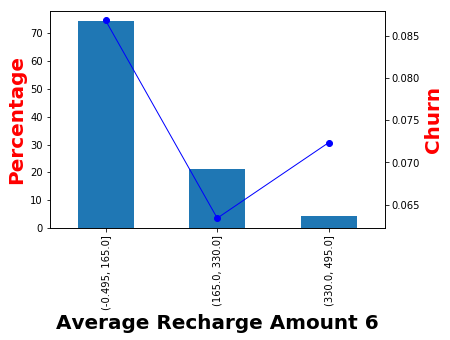

In [382]:
#Ave recharge Amount Month 6
temp = outliers(telecom_1.copy(),'av_rech_amt_data_6',3)
graph(temp, temp.av_rech_amt_data_6_bin, "Average Recharge Amount 6")

                        count      mean
av_rech_amt_data_7_bin                 
(-0.525, 175.0]         21531  0.095165
(175.0, 350.0]           6626  0.044220
(350.0, 525.0]           1796  0.050668
av_rech_amt_data_7_bin
(-0.525, 175.0]    71.882616
(175.0, 350.0]     22.121323
(350.0, 525.0]      5.996060
Name: fraction, dtype: float64


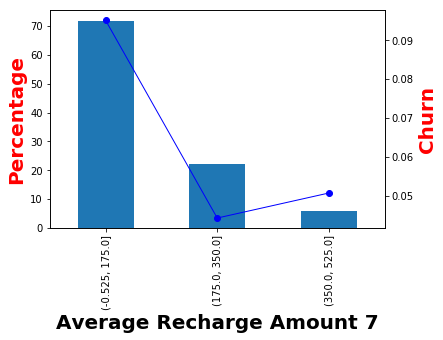

In [383]:
#Ave recharge Amount Month 7
temp = outliers(telecom_1.copy(),'av_rech_amt_data_7',3)
graph(temp, temp.av_rech_amt_data_7_bin, "Average Recharge Amount 7")

                        count      mean
av_rech_amt_data_8_bin                 
(-0.49, 163.333]        22864  0.101601
(163.333, 326.667]       5826  0.015791
(326.667, 490.0]         1263  0.014252
av_rech_amt_data_8_bin
(-0.49, 163.333]      76.332922
(163.333, 326.667]    19.450472
(326.667, 490.0]       4.216606
Name: fraction, dtype: float64


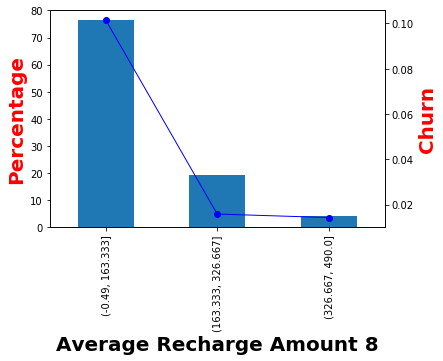

In [384]:
#Ave recharge Amount Month 8
temp = outliers(telecom_1.copy(),'av_rech_amt_data_8',3)
graph(temp, temp.av_rech_amt_data_8_bin, "Average Recharge Amount 8")

                      count      mean
total_rech_amt_6_bin                 
(-1.545, 309.0]        6058  0.073292
(309.0, 618.0]        12124  0.070851
(618.0, 927.0]         7247  0.082655
(927.0, 1236.0]        3228  0.113073
(1236.0, 1545.0]       1296  0.128086
total_rech_amt_6_bin
(-1.545, 309.0]     20.225019
(309.0, 618.0]      40.476747
(618.0, 927.0]      24.194571
(927.0, 1236.0]     10.776884
(1236.0, 1545.0]     4.326779
Name: fraction, dtype: float64


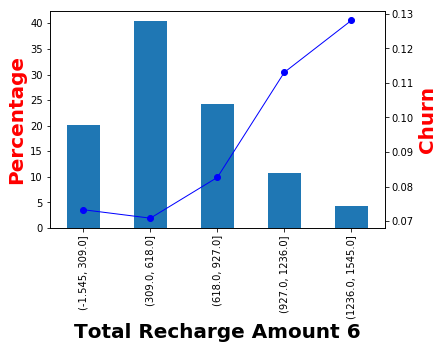

In [385]:
#Month 6
temp = outliers(telecom_1.copy(),'total_rech_amt_6',5)
graph(temp, temp.total_rech_amt_6_bin, "Total Recharge Amount 6")

                      count      mean
total_rech_amt_7_bin                 
(-1.552, 310.4]        6340  0.119716
(310.4, 620.8]        12030  0.067249
(620.8, 931.2]         7137  0.067255
(931.2, 1241.6]        3116  0.087612
(1241.6, 1552.0]       1330  0.084211
total_rech_amt_7_bin
(-1.552, 310.4]     21.166494
(310.4, 620.8]      40.162922
(620.8, 931.2]      23.827329
(931.2, 1241.6]     10.402965
(1241.6, 1552.0]     4.440290
Name: fraction, dtype: float64


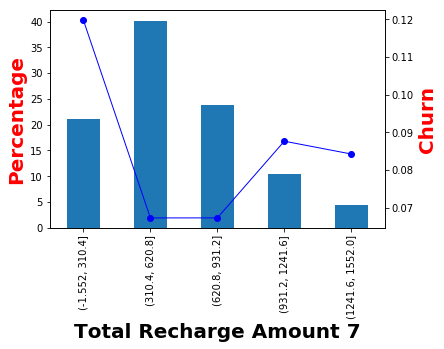

In [386]:
#Month 7
temp = outliers(telecom_1.copy(),'total_rech_amt_7',5)
graph(temp, temp.total_rech_amt_7_bin, "Total Recharge Amount 7")

                      count      mean
total_rech_amt_8_bin                 
(-1.565, 313.0]        9675  0.183359
(313.0, 626.0]        10623  0.036430
(626.0, 939.0]         5918  0.026191
(939.0, 1252.0]        2607  0.027618
(1252.0, 1565.0]       1130  0.039823
total_rech_amt_8_bin
(-1.565, 313.0]     32.300604
(313.0, 626.0]      35.465563
(626.0, 939.0]      19.757620
(939.0, 1252.0]      8.703636
(1252.0, 1565.0]     3.772577
Name: fraction, dtype: float64


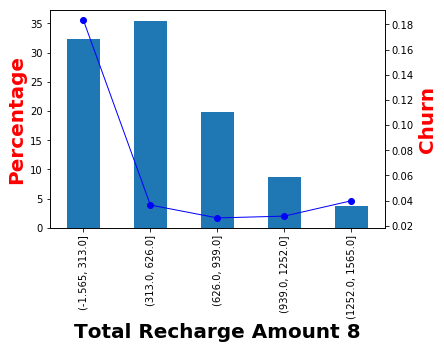

In [387]:
#Month 8
temp = outliers(telecom_1.copy(),'total_rech_amt_8',5)
graph(temp, temp.total_rech_amt_8_bin, "Total Recharge Amount 8")

                    count      mean
arpu_6_bin                         
(-210.96, 288.747]   6706  0.074858
(288.747, 786.96]   18932  0.076009
(786.96, 1285.172]   4315  0.114021
arpu_6_bin
(-210.96, 288.747]    22.388409
(288.747, 786.96]     63.205689
(786.96, 1285.172]    14.405903
Name: fraction, dtype: float64


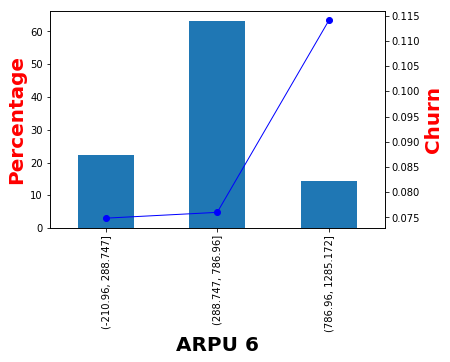

In [388]:
#Month 6
temp = outliers(telecom_1.copy(),'arpu_6',3)
graph(temp, temp.arpu_6_bin, "ARPU 6")

                     count      mean
arpu_7_bin                          
(-180.488, 307.931]   7405  0.107900
(307.931, 794.89]    18455  0.070658
(794.89, 1281.848]    4093  0.080625
arpu_7_bin
(-180.488, 307.931]    24.722065
(307.931, 794.89]      61.613194
(794.89, 1281.848]     13.664741
Name: fraction, dtype: float64


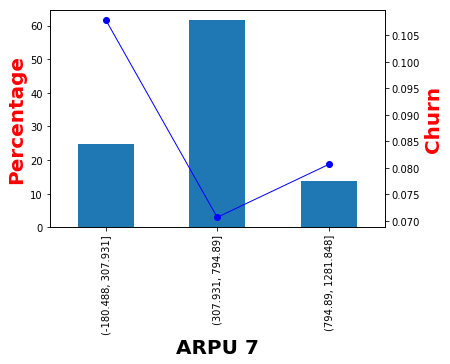

In [389]:
#Month 7
temp = outliers(telecom_1.copy(),'arpu_7',3)
graph(temp, temp.arpu_7_bin, "ARPU 7")

                     count      mean
arpu_8_bin                          
(-346.781, 205.495]   6438  0.238428
(205.495, 756.12]    19197  0.040110
(756.12, 1306.744]    4318  0.029643
arpu_8_bin
(-346.781, 205.495]    21.493673
(205.495, 756.12]      64.090408
(756.12, 1306.744]     14.415918
Name: fraction, dtype: float64


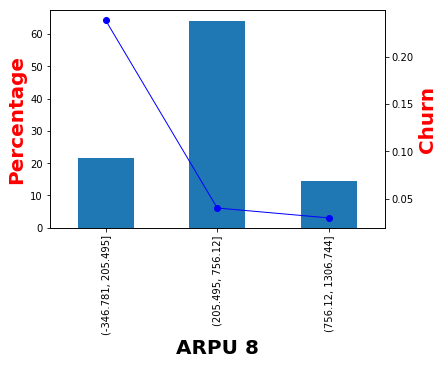

In [390]:
#Month 8
temp = outliers(telecom_1.copy(),'arpu_8',3)
graph(temp, temp.arpu_8_bin, "ARPU 8")

                       count      mean
total_rech_data_6_bin                 
(-0.005, 1.667]        22664  0.085201
(1.667, 3.333]          5479  0.064793
(3.333, 5.0]            1810  0.081215
total_rech_data_6_bin
(-0.005, 1.667]    75.665209
(1.667, 3.333]     18.291991
(3.333, 5.0]        6.042800
Name: fraction, dtype: float64


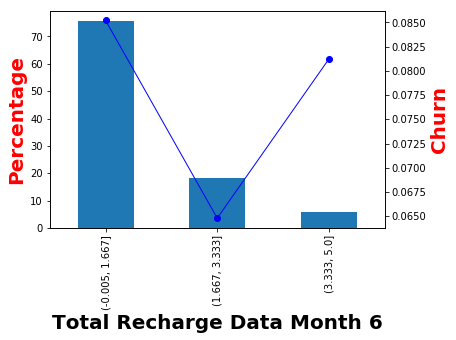

In [391]:
#total Recharge month 6
temp = outliers(telecom_1.copy(),'total_rech_data_6',3)
graph(temp, temp.total_rech_data_6_bin, "Total Recharge Data Month 6")

                       count      mean
total_rech_data_7_bin                 
(-0.005, 1.667]        22524  0.089948
(1.667, 3.333]          5361  0.054094
(3.333, 5.0]            2068  0.056576
total_rech_data_7_bin
(-0.005, 1.667]    75.19781
(1.667, 3.333]     17.89804
(3.333, 5.0]        6.90415
Name: fraction, dtype: float64


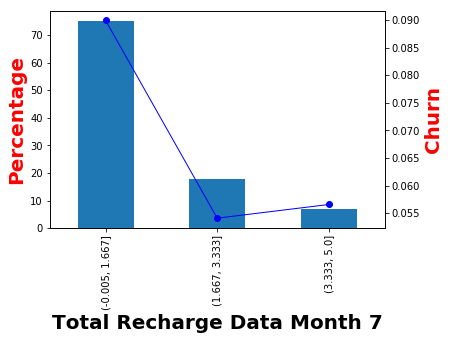

In [392]:
#total Recharge month 7
temp = outliers(telecom_1.copy(),'total_rech_data_7',3)
graph(temp, temp.total_rech_data_7_bin, "Total Recharge Data Month 7")

                       count      mean
total_rech_data_8_bin                 
(-0.005, 1.667]        23587  0.095858
(1.667, 3.333]          4598  0.029578
(3.333, 5.0]            1768  0.020362
total_rech_data_8_bin
(-0.005, 1.667]    78.746703
(1.667, 3.333]     15.350716
(3.333, 5.0]        5.902581
Name: fraction, dtype: float64


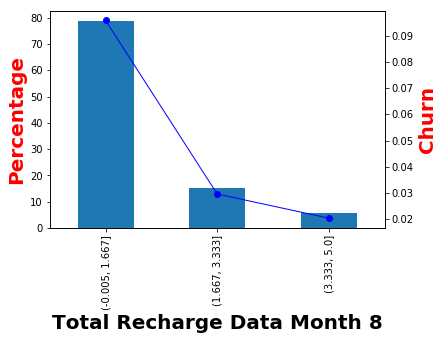

In [393]:
#total Recharge month 8
temp = outliers(telecom_1.copy(),'total_rech_data_8',3)
graph(temp, temp.total_rech_data_8_bin, "Total Recharge Data Month 8")

                  count      mean
age_recharge_bin                 
(-0.013, 3.25]    19731  0.064974
(3.25, 6.5]        6299  0.107319
(6.5, 9.75]        2349  0.118348
(9.75, 13.0]       1574  0.125159
age_recharge_bin
(-0.013, 3.25]    65.873201
(3.25, 6.5]       21.029613
(6.5, 9.75]        7.842286
(9.75, 13.0]       5.254899
Name: fraction, dtype: float64


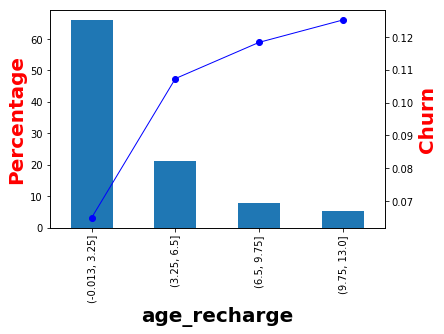

In [394]:
#age recharge
temp = outliers(telecom_1.copy(),'age_recharge',4)
graph(temp, temp.age_recharge_bin, "age_recharge")

In [395]:
from sklearn.model_selection import train_test_split
var_6 = ['churn','mobile_number','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
               'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
               'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
# Putting feature variable to X
X = telecom_1.drop(var_6,axis=1)

# Putting response variable to y
y = telecom_1['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [396]:
#checing if dataset is balanced
churn = (sum(y)/len(y.index))*100
churn

8.122725603445398

In [397]:
from imblearn.under_sampling import RandomUnderSampler

# Apply the random under-sampling
ind = RandomUnderSampler(return_indices=True)
X_res, y_res, idx = ind.fit_sample(X, y)

In [398]:
y_res=pd.DataFrame(y_res)

# Renaming the column '0' as 'churn'
y_res= y_res.rename(columns={ 0 : 'churn'})
X_res=pd.DataFrame(X_res,columns=X.columns)

# Amar

In [399]:
len(idx)

4866

In [400]:
X_res.shape

(4866, 166)

In [401]:
y_res.shape

(4866, 1)

In [402]:
# since the size of X_res and y_res is smaller than 29,953 am taking the "X" DataFrame
X.shape

(29953, 166)

# <font color="red">Splitting the data. The X and y passed in this are the ones without using RandomUnderSampler</font>

### Standardizing the data

In [485]:
colnames = list(X.columns)

In [508]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)
X_scal = pd.DataFrame(X_scal)
X_scal.columns = colnames

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [518]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scal = scaler.fit_transform(X)
X_scal = pd.DataFrame(X_scal)
X_scal.columns = colnames

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [519]:
X_scal.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8_churn,age_date_of_last_rech_6,age_date_of_last_rech_7,age_date_of_last_rech_8,age_date_of_last_rech_data_6,age_date_of_last_rech_data_7,age_date_of_last_rech_data_8,age_recharge,age_recharge_data,age_recharge_and_data
0,0.08,0.06,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.27,0.00,0.27
1,0.11,0.09,0.12,0.01,0.01,0.00,0.05,0.06,0.02,0.01,...,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.06,1.00,0.06
2,0.09,0.07,0.03,0.06,0.04,0.00,0.01,0.01,0.01,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.01,0.00,0.01
3,0.09,0.07,0.05,0.01,0.02,0.01,0.09,0.09,0.07,0.00,...,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00
4,0.08,0.06,0.04,0.01,0.01,0.00,0.01,0.01,0.01,0.00,...,0.00,0.01,0.01,0.00,1.00,0.01,0.00,0.08,0.00,0.08


In [520]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scal,y, train_size=0.7,test_size=0.3,random_state=100)

In [521]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [522]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [523]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'Col-Name':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df = pcs_df.sort_values(['PC1'], ascending=False)

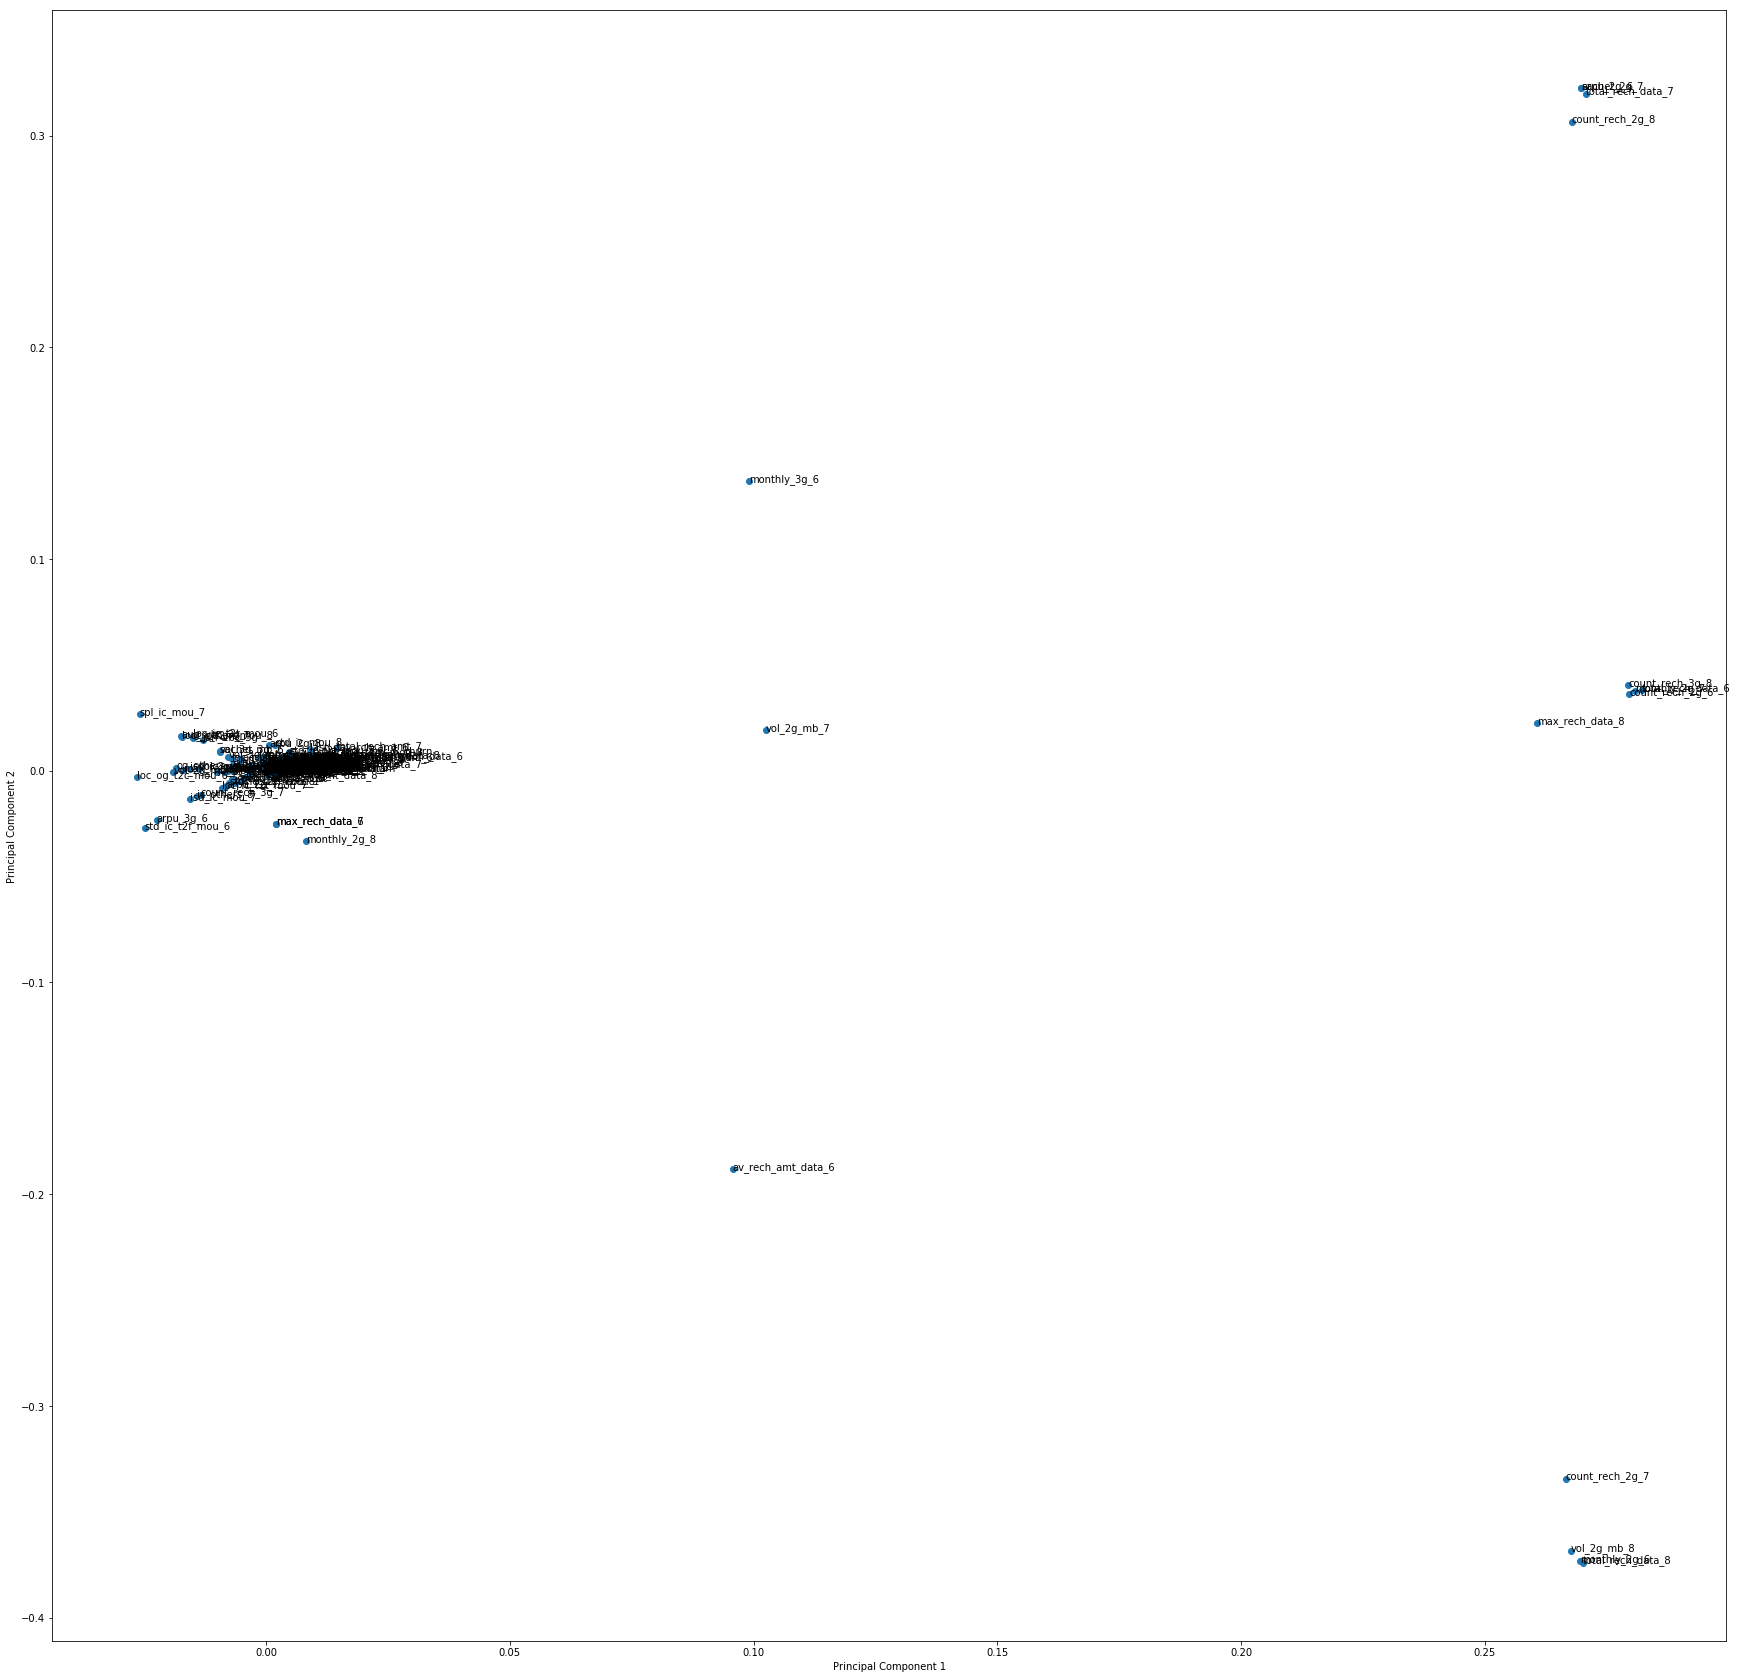

In [524]:
%matplotlib inline
fig = plt.figure(figsize = (30,30))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df['Col-Name']):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
#plt.tight_layout()
plt.show()
#fig.savefig("PCA-Graph-std-scaler.png")
fig.savefig("PCA-Graph-min-max-scaler.png")

In [494]:
for i in pca.explained_variance_ratio_:
    print("%.4f" % i)

0.6629
0.1244
0.0931
0.0167
0.0158
0.0115
0.0078
0.0070
0.0057
0.0056
0.0052
0.0039
0.0030
0.0029
0.0025
0.0022
0.0020
0.0018
0.0015
0.0013
0.0012
0.0010
0.0010
0.0009
0.0009
0.0009
0.0009
0.0008
0.0008
0.0007
0.0007
0.0007
0.0006
0.0006
0.0006
0.0006
0.0005
0.0005
0.0005
0.0005
0.0005
0.0004
0.0004
0.0004
0.0003
0.0003
0.0003
0.0003
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0002
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000

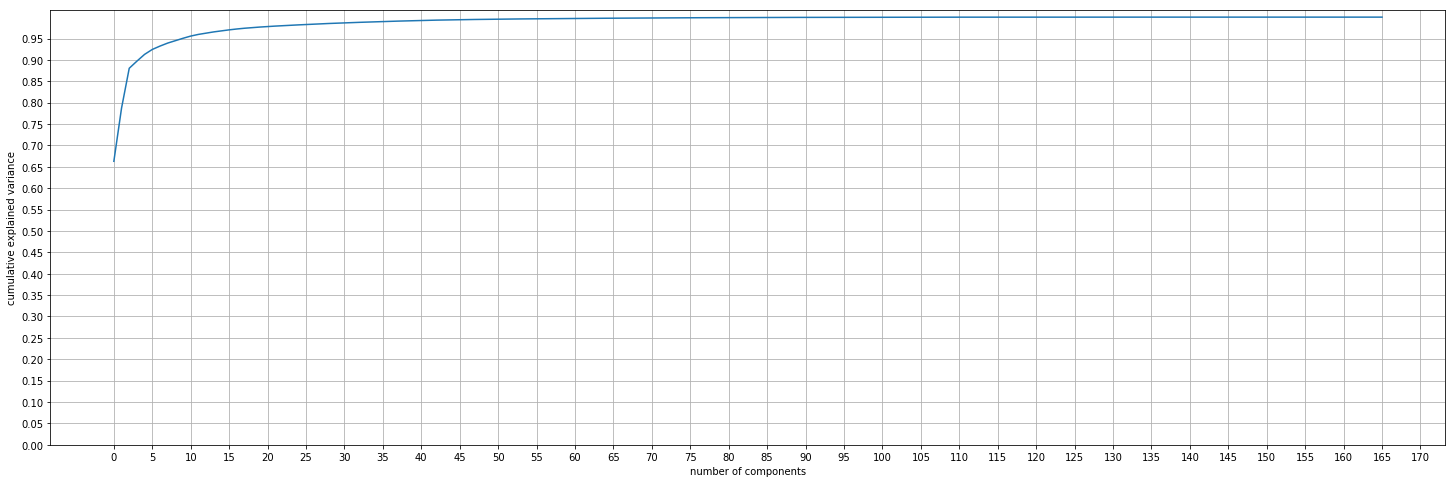

In [525]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (25,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0, 175, 5))
plt.yticks(np.arange(0, 1, 0.05))
plt.grid(which='both')
plt.show()
#fig.savefig("scree-plot-std-scaler.png")
fig.savefig("scree-plot-min-max-scaler.png")

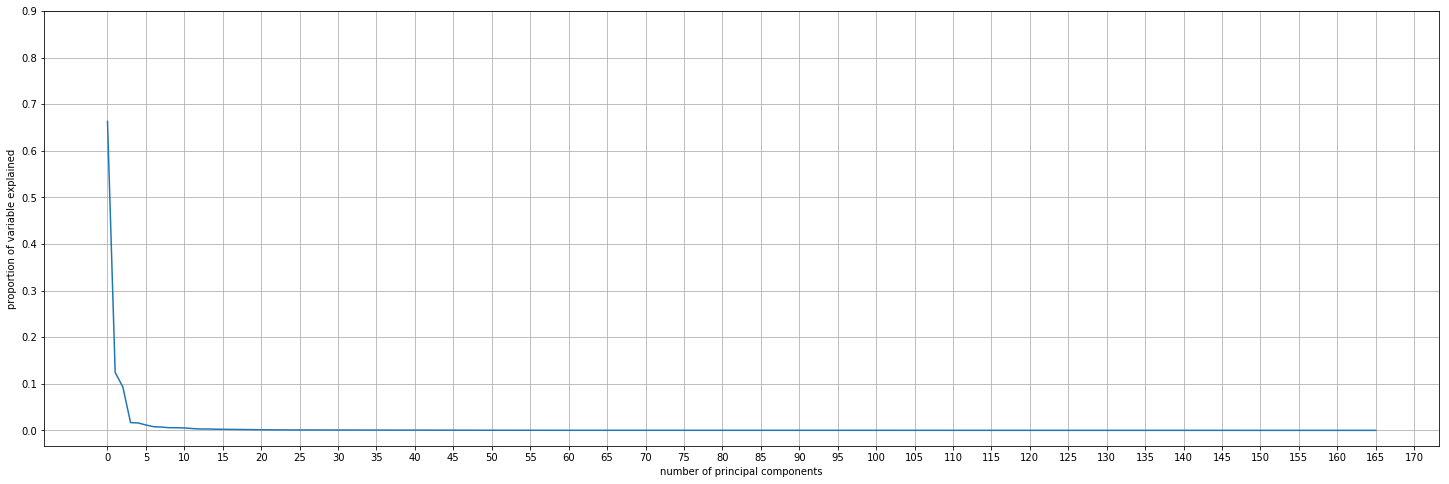

In [526]:
fig = plt.figure(figsize = (25,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of principal components')
plt.ylabel('proportion of variable explained')
plt.xticks(np.arange(0, 175, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid(which='both')
plt.show()
#fig.savefig("explanation-by-variables-std-scaler.png")
fig.savefig("explanation-by-variables-min-max-scaler.png")

In [498]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

In [528]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20967, 10)

In [529]:
df_train_pca

array([[ 2.05135961e+00, -3.59792148e-02, -1.82435498e-03, ...,
        -1.14616367e-02,  2.39015141e-02, -1.12084917e-01],
       [ 2.05125193e+00, -3.02969097e-02, -2.27302414e-03, ...,
        -3.35223762e-03,  1.83944608e-02, -1.04920402e-01],
       [-1.60968825e+00, -4.77991594e-02,  6.72740596e-02, ...,
        -3.17554379e-01,  7.87076385e-02,  1.09027077e-01],
       ...,
       [-1.59741740e+00, -4.61434371e-02,  7.35390551e-02, ...,
        -6.40043319e-02,  3.63574168e-01,  8.50971853e-02],
       [-1.59980342e+00, -6.01526451e-02,  6.23079036e-02, ...,
        -1.44481574e-01,  4.12078316e-02,  1.71564357e-01],
       [ 2.05006824e+00, -3.80364667e-02,  1.11740083e-03, ...,
        -6.87522255e-02,  1.86512825e-02, -7.31165376e-02]])

In [500]:
corrmat = np.corrcoef(df_train_pca.transpose())

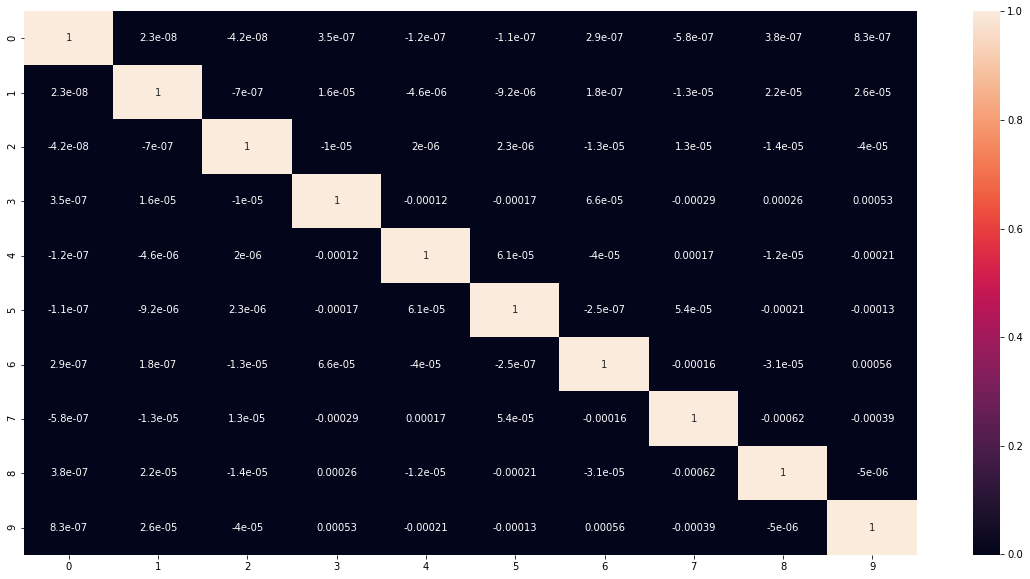

In [502]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat, annot=True)

In [449]:
U,s,VT = np.linalg.svd(X_train, full_matrices=True)

In [458]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8_churn,age_date_of_last_rech_6,age_date_of_last_rech_7,age_date_of_last_rech_8,age_date_of_last_rech_data_6,age_date_of_last_rech_data_7,age_date_of_last_rech_data_8,age_recharge,age_recharge_data,age_recharge_and_data
5067,0.025073,0.643463,0.295814,-0.101601,-0.146768,-0.192668,0.418806,0.776905,1.818421,3.271238,...,1.046820,-0.047295,-0.056162,-0.142545,1.125603,1.148635,1.066254,-0.274353,1.502505,-0.274287
25362,0.452503,-0.857865,-0.960676,0.244058,-0.429552,-0.501882,0.838690,-0.464454,-0.689728,-0.211205,...,1.046820,-0.058824,-0.049557,-0.139829,1.125603,1.148635,1.066254,0.002063,1.502505,0.002346
10076,-0.826671,-0.926489,-0.679686,-0.565235,-0.557557,-0.499746,-0.699994,-0.740594,-0.544617,-0.211205,...,-1.008934,-0.054981,-0.066071,-0.146621,-0.891377,-0.870213,-0.941182,-0.688976,-0.673000,-0.689237
7679,0.979706,0.486997,0.698302,2.761969,2.557236,2.696637,0.045659,-0.363478,0.016219,-0.211205,...,1.046820,-0.058824,-0.069373,-0.142545,1.125603,1.148635,1.066254,-0.274353,1.502505,-0.274287
14966,-0.909993,-1.029378,-0.651010,-0.522221,-0.540026,-0.454187,-0.538467,-0.648273,-0.303610,-0.211205,...,-1.008934,-0.035766,-0.069373,-0.141187,-0.889466,-0.874403,-0.937798,-0.136145,-0.669333,-0.135971
27690,-0.161557,-0.089166,-0.335782,-0.521025,-0.533092,-0.452683,0.411452,0.098725,-0.222818,-0.211205,...,-1.008934,-0.062667,-0.069373,-0.142545,1.125603,-0.874403,-0.938550,-0.274353,-0.670148,-0.274287
6262,-0.388621,-0.004236,-0.602536,-0.354490,-0.266173,-0.368038,-0.142262,-0.428151,-0.435006,-0.211205,...,1.046820,-0.062667,-0.066071,-0.145262,1.125603,1.148635,1.066254,-0.550768,1.502505,-0.550921
1424,-0.142759,1.121453,0.800062,0.288704,1.712443,1.223526,-0.569169,-0.672876,-0.486668,-0.211205,...,1.046820,-0.062667,-0.066071,-0.146621,1.125603,1.148635,1.066254,-0.688976,1.502505,-0.689237
18887,1.000079,0.624374,0.421691,2.814878,2.253215,1.929367,1.296009,0.694561,0.350820,-0.211205,...,-0.152370,-0.062667,-0.069373,-0.142545,1.125603,1.148635,-0.939302,-0.274353,-0.670963,-0.274287
21093,1.674847,1.401072,1.134061,-0.247172,-0.201630,0.342489,1.434707,1.369435,0.008521,1.008816,...,-1.008934,-0.043452,-0.039649,-0.143904,-0.887173,-0.868309,-0.935167,-0.412561,-0.666481,-0.412604


In [450]:
print('U shape: ', U.shape)
print('s shape: ', s.shape)
print('VT shape: ', VT.shape)

U shape:  (20967, 20967)
s shape:  (166,)
VT shape:  (166, 166)


In [484]:
pd.DataFrame(U)

In [477]:
for i in s:
    print(format(i, '.2f'))

682.56
548.27
456.20
435.91
352.50
336.25
332.81
299.11
286.58
279.39
269.85
260.11
253.90
247.05
242.09
236.52
231.47
228.88
221.70
219.76
216.43
208.48
199.58
190.96
185.57
185.14
182.76
177.57
169.00
164.47
159.11
156.92
156.23
153.93
149.47
147.52
145.09
143.11
141.35
139.74
137.87
134.52
130.96
130.75
129.46
125.32
123.32
120.95
118.95
118.12
117.35
116.55
109.82
109.20
106.58
105.32
103.25
101.68
99.52
98.90
96.58
96.04
91.77
91.09
90.44
88.72
87.49
84.84
83.93
83.58
83.02
82.50
80.00
78.99
78.66
78.20
77.68
77.12
76.29
75.84
74.66
73.47
72.36
70.84
69.93
69.53
69.09
68.75
67.82
66.31
65.97
65.25
64.44
64.27
63.17
61.50
61.29
58.63
57.83
57.07
56.46
54.85
53.97
53.71
51.97
49.97
47.54
46.92
44.94
42.88
41.99
40.51
39.18
37.84
33.92
32.97
31.76
31.17
28.63
27.63
27.39
26.87
25.74
21.75
16.00
12.37
11.80
7.97
5.65
2.09
1.27
1.05
0.72
0.48
0.28
0.22
0.21
0.01
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00


In [483]:
pd.options.display.float_format = '{:,.2f}'.format
VT = pd.DataFrame(VT)

VT.to_csv('vt.csv')